# **Sleep, Health and Lifestyle Exploratory Data Analysis**.

This notebook explores patterns in sleep duration using a dataset from Kaggle of individuals' health and demographic data. The goal is to understand sleep habits and how they might vary by stress level, gender or other factors.

## **Key Questions Answered:**

1. What is the distribution of sleep duration among individuals?
2. How does stress level relate to sleep duration and sleep quality?
3. Is there a relationship between physical activity and sleep quality?
4. Are there noticeable differences in sleep duration between males and females?
5. Do people in different age groups sleep differently?
6. How does occupation affect stress levels?

### **Load and Inspect Data**

In [78]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
#Load dataset
health_sleep = pd.read_csv('Downloads/archive (8)/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv')

In [10]:
#View first 5 rows
health_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
#Understand data
print("Shape: ", health_sleep.shape)

Shape:  (374, 13)


In [198]:
#Checking Column Names
print("Column names: ", health_sleep.columns)

Column names:  Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'Age_group'],
      dtype='object')


In [18]:
#Information about Data types
health_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [20]:
#Summary of numeric columns
health_sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### **Cleaning Data**

In [23]:
#Check for missing values
health_sleep.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [33]:
#Checking for duplicates
health_sleep.duplicated().sum()

0

In [39]:
#Converting to Categories 
cat_cols = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]
for col in cat_cols:
    health_sleep[col] = health_sleep[col].astype("category")

In [47]:
#Confirm category datatypes
health_sleep.dtypes

Person ID                     int64
Gender                     category
Age                           int64
Occupation                 category
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category               category
Blood Pressure               object
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder             category
dtype: object

In [200]:
#Parse Blood Pressure into systolic and diastolic columns and coverting to numeric values for analysis
bp_split = health_sleep["Blood Pressure"].str.split("/", expand = True)
health_sleep["Systolic_bp"] = pd.to_numeric(bp_split[0])
health_sleep["Diastolic_bp"] = pd.to_numeric(bp_split[1])

In [180]:
#Categorise Ages based on summary statistics
age_summary = health_sleep['Age'].describe() #Getting summary of age statistics
age_summary

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

In [20]:
#Creating summary variables
min_age = age_summary["min"]
q1 = age_summary["25%"]
median = age_summary["50%"]
q3 = age_summary["75%"]
max_age = age_summary["max"]

#Create bins and labels
bins = [min_age -1, q1, median, q3, max_age]
labels = ["Young adult", "Early middle", "Late Middle", "Senior Adult"]

#Create age group column"
health_sleep["Age_group"] = pd.cut(health_sleep["Age"], bins=bins, labels=labels)
health_sleep


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,Young adult
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Young adult
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,Young adult
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Young adult
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Senior Adult
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Senior Adult
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Senior Adult
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,Senior Adult


### **Visualizations**

#### **1. What is the distribution of sleep duration among individuals?**

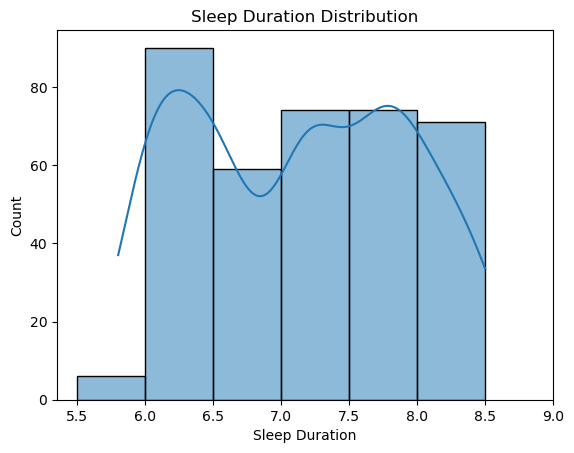

In [88]:
# Set the bin edges to be cleaner 
bin_edges = np.arange(5.5, 9.0, 0.5)

sns.histplot(health_sleep["Sleep Duration"], kde=True, bins=bin_edges)
plt.title("Sleep Duration Distribution")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.xticks(np.arange(5.5, 9.1, 0.5))  # Tick every 0.5 for clarity
plt.show()
          

Sleep duration ranges from approximately 5.8 to 8.5 hours. Following the primary peak at 6-6.5 hours (with roughly 90 individuals), there's a broader secondary peak across the 7-8 hour range (with approximately 70-75 individuals in each half-hour bin). The data also shows multiple peaks, suggesting common ranges of sleep habits.

#### **2. How does stress level relate to sleep duration and sleep quality?**

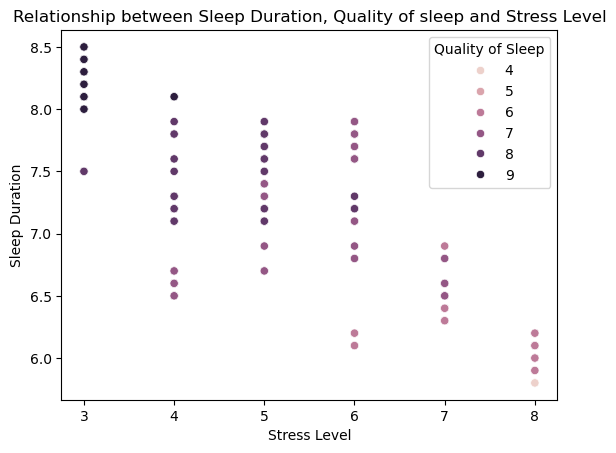

In [207]:
sns.scatterplot(x="Stress Level", y="Sleep Duration", hue="Quality of Sleep", data = health_sleep)
plt.title("Relationship between Sleep Duration, Quality of sleep and Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration")
plt.show()

There's a clear relationship between stress levels, sleep duration, and sleep quality:

**1. Negative correlation between stress and sleep duration:** As stress levels increase from 3 to 8, the average sleep duration tends to decrease. People with the lowest stress levels (3) consistently get the most sleep (around 8-8.5 hours), while those with the highest stress levels (8) get the least sleep (around 6 hours).

**2. Negative correlation between stress and sleep quality:** The color gradient shows that higher quality sleep (darker purple dots, 8-9 on the quality scale) is more common at lower stress levels, while lower quality sleep (lighter pink dots, 4-5 on the quality scale) is more prevalent at higher stress levels.

**3. Relationship between sleep duration and quality:** Longer sleep duration generally corresponds with better sleep quality, as shown by the darker dots typically appearing higher on the y-axis.



#### **3. Is there a relationship between physical activity and sleep quality?**

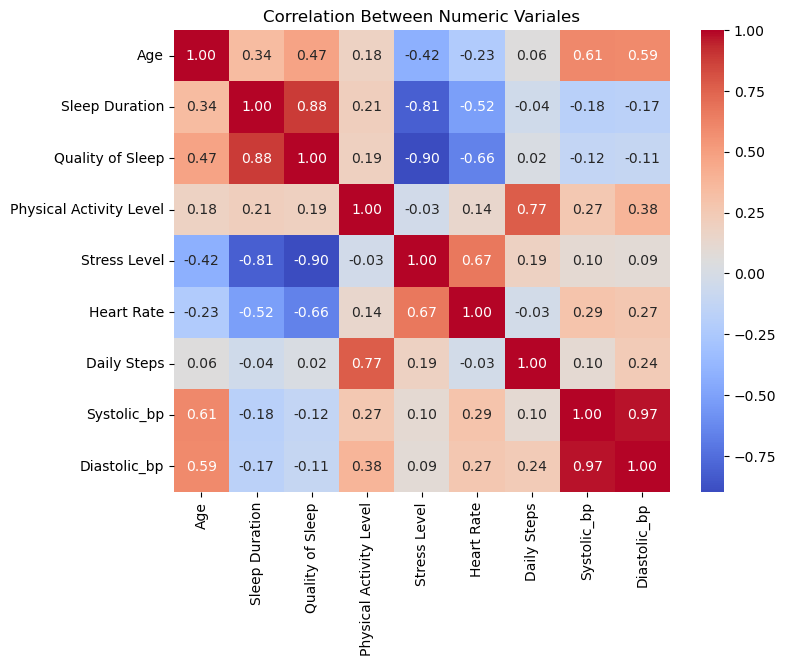

In [219]:
plt.figure(figsize=(8,6))
numeric_data = health_sleep.drop(columns="Person ID").select_dtypes(include="number") #Selects only numeric columns, drop Person ID column
sns.heatmap(numeric_data.corr(), annot = True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Variales")
plt.show()

The correlation coefficient between Physical Activity Level and Quality of Sleep is 0.19, indicating a weak positive correlation. This suggests that higher physical activity levels are somewhat associated with better sleep quality, though the relationship isn't particularly strong.

More notable relationships in the data include:

Quality of Sleep shows a very strong negative correlation with Stress Level (-0.90), indicating that higher stress is strongly associated with poorer sleep quality
Sleep Duration and Quality of Sleep are highly correlated (0.88), suggesting that longer sleep typically means better quality sleep

While physical activity does show a positive relationship with sleep quality, other factors like stress level appear to have a much more significant impact on sleep quality. The data suggests that stress reduction might be more effective for improving sleep quality than increasing physical activity alone.

#### **4. Are there noticeable differences in sleep duration between males and females?**

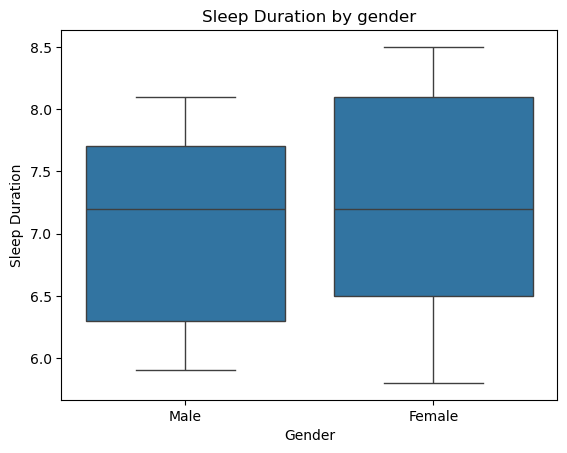

In [40]:
sns.boxplot(x="Gender", y="Sleep Duration", data=health_sleep)
plt.title("Sleep Duration by gender")
plt.show()
            

The box plots show that both genders have similar medians.  Females showa  slightlywidere spread in sleep duratio,nevident from the (wider nterquartile range. - No major outliers or extreme differences observed.

#### **5. Do people in different age groups sleep differently?**

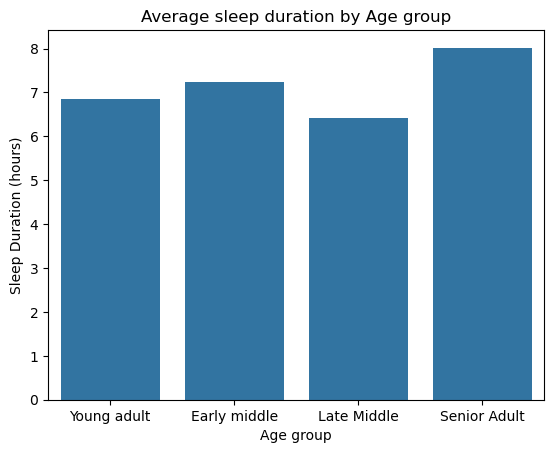

In [28]:
sns.barplot(x="Age_group", y="Sleep Duration", data=health_sleep, errorbar=None)
plt.title("Average sleep duration by Age group")
plt.ylabel("Sleep Duration (hours)")
plt.xlabel("Age group")
plt.show()
        

Yes, people in different age groups do sleep differently, as evidenced by the bar chart. Senior adults get the most sleep, averaging about 8 hours per night. Early middle-aged adults follow with about 7.2 hours. Young adults average around 6.9 hours of sleep, while late middle-aged adults get the least amount of sleep at about 6.4 hours.
This pattern interesting doesn't follow a linear progression with age. Senior adults sleeping the most might reflect their reduced work responsibilities and different lifestyle needs, while the dip in the late middle age group could potentially be attributed to work stress, family responsibilities, or health factors that affect sleep quality.

### **6. How does occupation affect stress levels?**

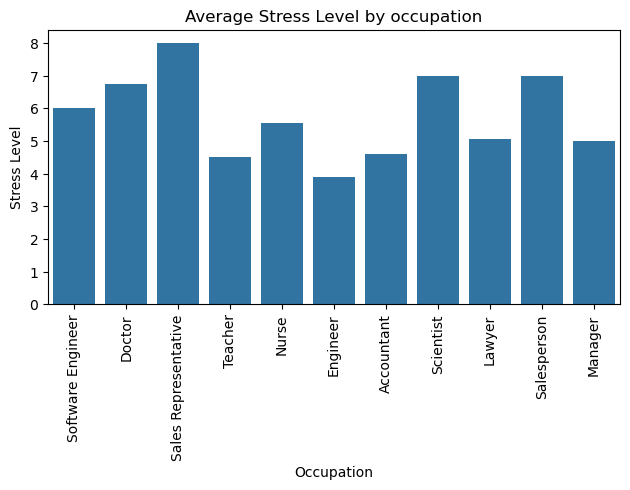

In [59]:
sns.barplot(x="Occupation", y="Stress Level", data=health_sleep, errorbar=None)
plt.xlabel("Occupation")
plt.ylabel("Stress Level")
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Average Stress Level by occupation")
plt.show()

This bar plot shows the average stress level reported across different occupations.
Sales Representatives report the highest average stress levels, close to 8, indicating a highly stressful work environment.
Doctors, Scientists, and Salespersons also report elevated stress levels (around 7).
Engineers have the lowest average stress level, followed by Managers, Lawyers, and Teachers, all ranging between 4.5 and 5.5.

This suggests a potential link between job nature and psychological strain. 

#### **Interaction among multiple variables**

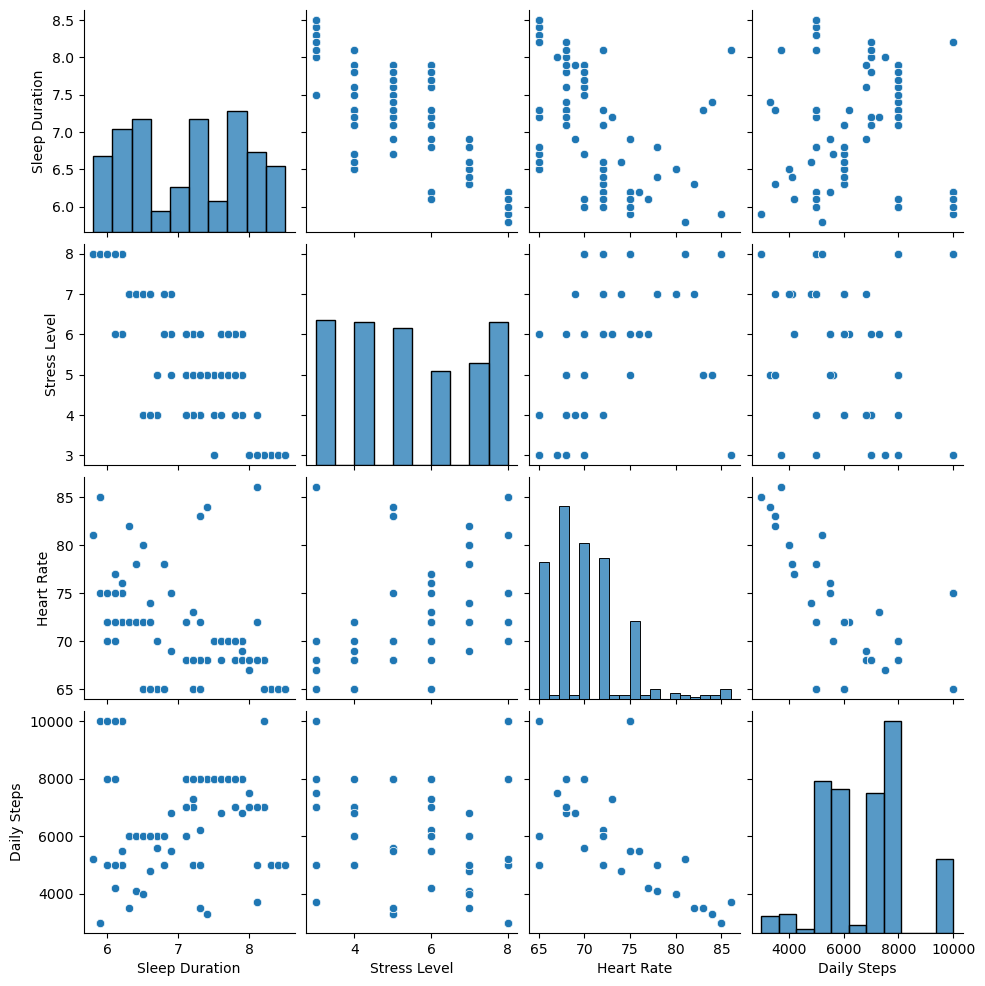

In [135]:
sns.pairplot(health_sleep[['Sleep Duration', 'Stress Level', 'Heart Rate', 'Daily Steps']])
plt.show()

# **Summary and Key Insights**

This analysis provided valuable insights into how sleep, stress, and lifestyle factors interact across different segments of the population:

- **Sleep duration distribution** showed that most individuals sleep between 6 and 8 hours, with a few outliers on both ends.
- There is a negative relationship between **stress level**, **sleep duration** and **sleep quality** suggesting that higher stress is generally associated with shorter sleep duration and lower sleep quality.
- **Physical activity (daily steps)** shows a weak positive trend with **sleep quality**, indicating that more active individuals may report better sleep.
- **Gender differences in sleep duration** were present but not highly pronounced - males and females had similar average sleep hours with slight variations.
- **Age group analysis** revealed that older adults (especially senior adults) tend to sleep more than younger groups.
- **Occupation and stress levels** showed clear variation - some job categories experienced significantly higher average stress levels than others.

# **Limitations of this analysis**
**1. Kaggle Dataset Source:** This analysis uses a dataset from Kaggle, which may have been created for educational purposes.

**2. Correlation vs. Causation:** The relationships identified are correlational. We cannot conclude that changes in one variable (e.g., physical activity) directly cause changes in another (e.g., sleep quality).

**3. Limited Statistical Testing:** This exploratory analysis focused primarily on visualizations and basic correlation analysis without formal hypothesis testing or controlling for multiple comparisons.

# **Next steps**
1. Implementing formal statistical testing to validate observed patterns
2. Building predictive models to estimate sleep quality based on health indicators.